# Week 3 - Project 2

### Team 5

#### Goal:
1. Identify a large 2-node network.  Your data should consist of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method (ex. island method)
3. What can you infer about each of the distinct groups?


### 1. Importing our 2-node network
The Facebook-like Forum Network was attained from the Tore Opsahl website: https://toreopsahl.com/datasets/#online_forum_network. The data represents an two-mode network among 899 users and 522 topics, where the connections are weighted on the ties based on the number of messages or characters that a user posted to a topic.

In [84]:
import networkx as net
import csv
import pandas as pd
import requests
import io
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import math
%matplotlib inline

request = requests.get("https://raw.githubusercontent.com/Galanopoulog/DATA620-Project-2/master/p2_data.csv").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))
    
    

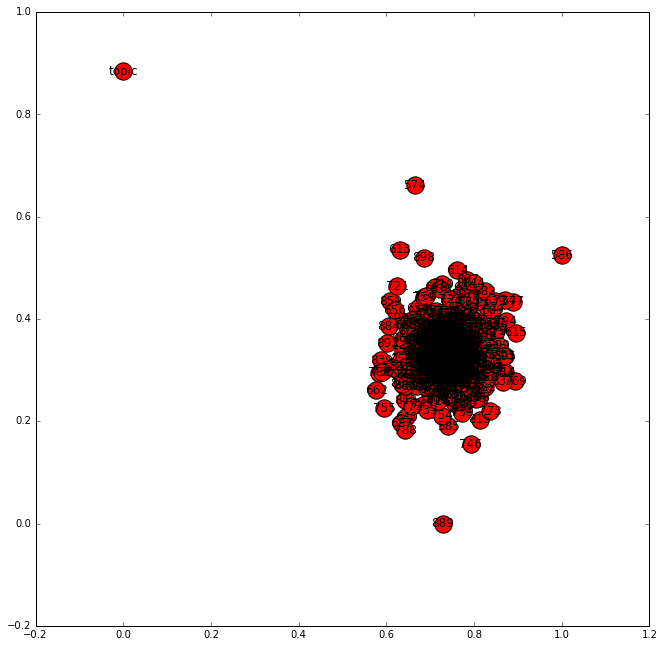

In [91]:
fb_csv = csv.reader(open('p2_data.csv'))
users = []
topics = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in users:
        users.append(row[0])
    if row[1] not in topics:
        topics.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]
net.draw_networkx(topic_net,width=weights,edge_color=weights)

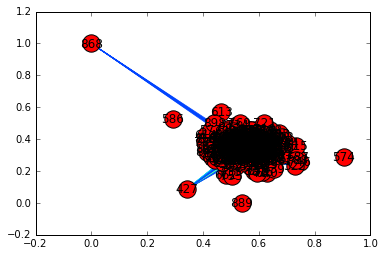

In [98]:

#plt.figure(figsize=(11,11))
topic_net = bi.weighted_projected_graph(fb_g, topics, ratio=False)
topic_net=max(net.connected_component_subgraphs(topic_net),key=len)
weights=[math.log(edata['weight'])for f,t,edata in topic_net.edges(data=True)]
net.draw_networkx(topic_net,width=weights,edge_color=weights)



In [ ]:
net.draw_networkx(p,width=weights,edge_color=weights)

### 2. Reducing the Network

### 3. Inferences About Groups